<a href="https://colab.research.google.com/github/Sarthak777999/Tourism-Demand-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/FINAL-DATA-without-covid.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (360, 1)


,Visitors
Date,
1990-01-01,246690.0
1990-02-01,211618.0
1990-03-01,260054.0
1990-04-01,288976.0
1990-05-01,281982.0
...,...
2019-08-01,2519977.0
2019-09-01,2272807.0
2019-10-01,2496453.0


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


<Axes: xlabel='Date'>

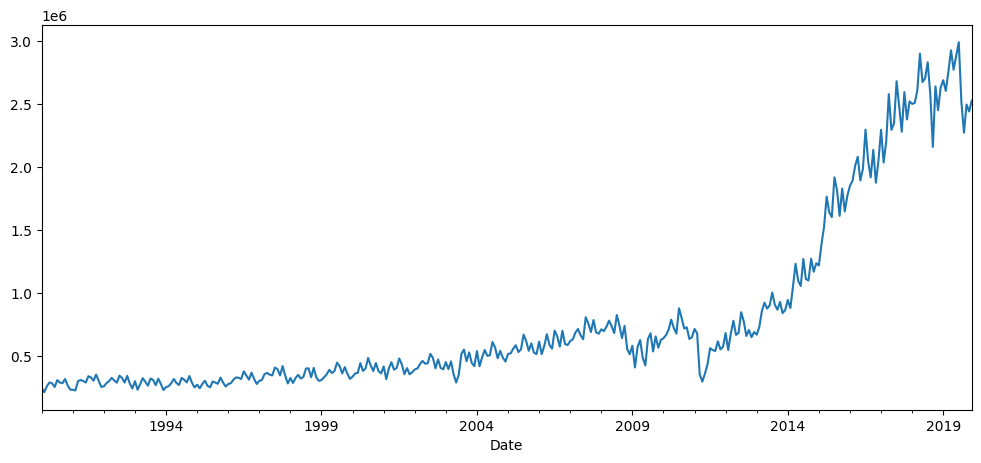

In [ ]:
df['Visitors'].plot(figsize=(12,5))

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Visitors'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9143.304, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9343.277, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9308.346, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9281.444, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9342.521, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9260.777, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9217.177, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9136.109, Time=2.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9211.422, Time=0.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9208.438, Time=1.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9131.011, Time=3.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9133.878, Time=3.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=9130.782, Time=4.28 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=9135.629, Time=4.54 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept

In [ ]:
print(df.shape)
train=df.iloc[:348]
test=df.iloc[348:]
print(train.shape,test.shape)

(360, 1)
(348, 1) (12, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Visitors'],order=(1,0,5))
model=model.fit()
model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Visitors   No. Observations:                  348
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4462.102
Date:                Fri, 21 Jul 2023   AIC                           8940.204
Time:                        18:06:41   BIC                           8971.022
Sample:                    01-01-1990   HQIC                          8952.473
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.226e+05   5.64e-11   1.28e+16      0.000    7.23e+05    7.23e+05
ar.L1          0.9990      0.002    447.348      0.000       0.995       1.003
ma.L1         -0.3620      0.047     -7.627      0.000      -0.455      -0.269
ma.L2         -0.2054      0.060     -3.440      0.001      -0.322      -0.088
ma.L3          0.3348      0.047      7.172      0.000       0.243       0.426
ma.L4         -0.0504      0.061     -0.821      0.412      -0.171       0.070
ma.L5         -0.1348      0.046     -2.941      0.003      -0.225      -0.045
sigma2       1.02e+10   3.37e-12   3.03e+21      0.000    1.02e+10    1.02e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               316.02
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):              16.25   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+37. Standard errors may be unstable.
"""

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Forecasting with ARIMA (Data till 2014)')

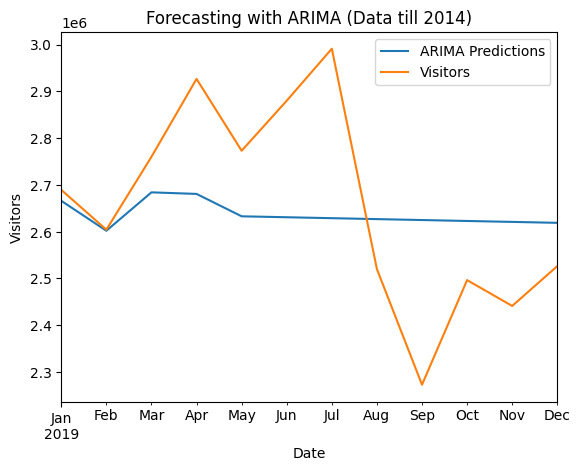

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Visitors'].plot(legend=True)
plt.ylabel("Visitors")
plt.title("Forecasting with ARIMA (Data till 2014)")

In [ ]:

test['Visitors'].mean()


200048.3

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Visitors'].mean()
rmse=sqrt(mean_squared_error(pred,test['Visitors']))
print("Rmse",rmse)


Rmse 307950.79472935566


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:

print ('MAE =',mean_absolute_error(pred,test['Visitors']))

MAE = 159620.27114646017


In [ ]:
actual = pred
pred1 = test['Visitors']

In [ ]:
import numpy as np

def mape(actual, pred1):
    actual, pred1 = np.array(actual), np.array(pred1)
    return np.mean(np.abs((actual - pred1) / actual)) * 100
print("Mape", mape(actual, pred1))

Mape 88.52811160623268


In [ ]:
print ('MSE =',mean_squared_error(actual, pred1))

MSE = 94833691974.44174
